In [66]:
# initial imports

from pathlib import Path # pathlib module provides object-oriented interface for filesystem paths
import pandas as pd 
import tarfile # tarfile module allows for reading and writing of tar files
import urllib.request # urllib.request module is used for opening and reading URLs

<h4><strong>Getting the data</strong></h4>

In [67]:
# this function downloads the California housing dataset if it is not already present and loads it into a pandas DataFrame.
# functions are resuable pieces of code that perform a specific task - if the data was elsewhere, we would simply change the URL in one place

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") # path to the tarball file
    if not tarball_path.is_file(): # check if the tarball file does not exist
        Path("datasets").mkdir(parents=True, exist_ok=True) # create datasets directory if it doesn't exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz" # URL of the dataset
        urllib.request.urlretrieve(url, tarball_path) # download the tarball
        with tarfile.open(tarball_path) as housing_tarball: # open the tarball
            housing_tarball.extractall(path="datasets") # extract its contents to the datasets directory
    return pd.read_csv(Path("datasets/housing/housing.csv")) # load the CSV file into a pandas DataFrame and return it

# calling the function
housing = load_housing_data()

<h4><strong>Initial review of the data</strong></h4>

In [68]:
housing.head() # display the first few rows of the DataFrame.  The .head() function gives the first five lines of the data set across all atributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
housing.info() # display a summary of the DataFrame.  The .info() function provides information about the DataFrame including the number of non-null entries and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [70]:
# All data is numeric aside from ocean_proximity, which is categorica and can be viewed in more detail using the following code:

housing["ocean_proximity"].value_counts() # display the counts of unique values in the ocean_proximity column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [71]:
housing.describe() # display statistical summary of the DataFrame.  The .describe() function provides various summary statistics for numerical columns in the DataFrame    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h4><strong>Very early visualisation of the data</strong></h4>
This is very light touch ahead of the immediate test / train split

In [72]:
import matplotlib.pyplot as plt # import the matplotlib library for data visualisation

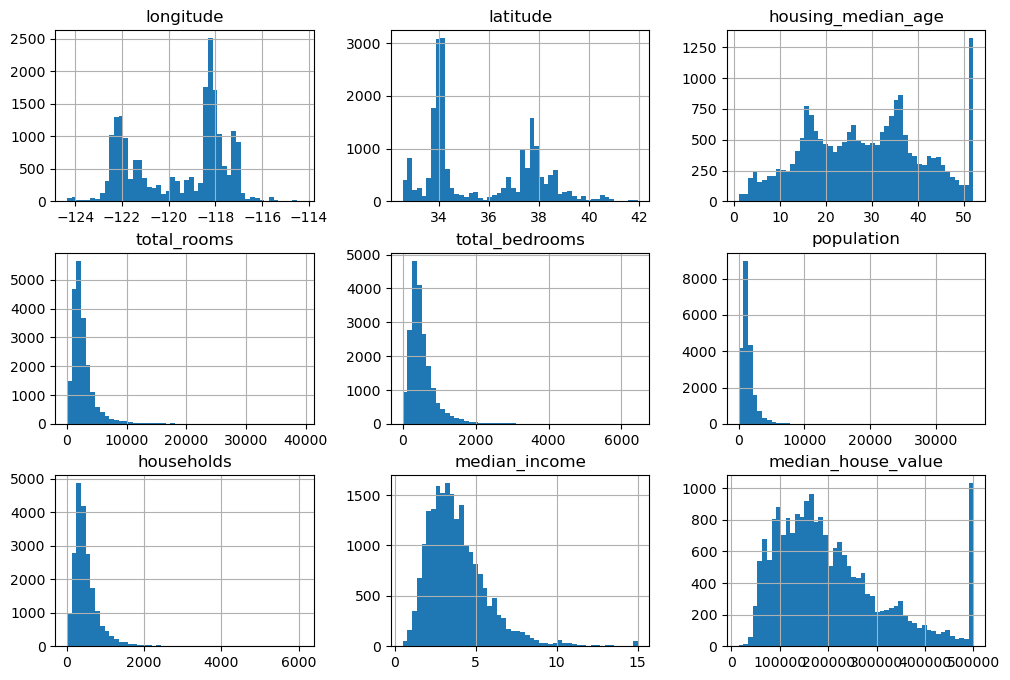

In [73]:
housing.hist(bins=50, figsize=(12,8)) # create histograms for each numerical attribute in the DataFrame with 50 bins and a figure size of 12x8 inches
plt.show() # display the histograms

From reviewing these histograms it is clear that - 

1. median_income is not expressed in $ amounts - this is actually a scaled and capped range with the numbers meaning "10's of thousands" therefore 5 would be $50,000 and 10 would be $100,000
2. housing_median_age and median_house_value are also capped - this is an issue as median_house_value is going to be the target attribute.
3. Many of the hostograms are on different scales.

Splitting the data into training and testing sets with conventional parameter of 20% random selection for the test set is good, but it runs the risk of introducing a sampling bias as random (i.e. there is a chance that higher median incomes may be randomly over represented).

Stratified sampling allows for the data set to be split into representative strata and the right number of instances taken from each strata to make up the test set and to ensure the test data is truly representative of the original data set.


<h4><strong>Stratified sampling for Train / Test split</strong></h4>

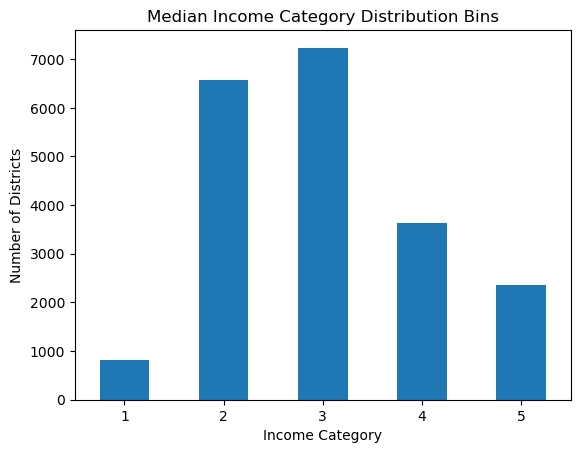

In [74]:

import numpy as np # import the numpy library for numerical operations
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # import StratifiedShuffleSplit and train_test_split from sklearn.model_selection for data splitting

housing["income_cat"] = pd.cut(housing["median_income"], # first the category " bins" are created based on median income - in this instance a new feature is made and median income is divided into 5 categories
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) # create income categories for stratified sampling

housing["income_cat"].value_counts().sort_index().plot(kind="bar", rot=0) # display bar chart of the created income categories
plt.xlabel("Income Category") # label x-axis
plt.ylabel("Number of Districts") # label y-axis    
plt.title("Median Income Category Distribution Bins") # title of the histogram
plt.show() # display the histogram


In [75]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"]) # split the data into stratified training and test sets based on income categories

<h4><strong>Validating the stratified split</strong></h4>

In [76]:
print("Test set income category proportions:")
print(strat_test_set["income_cat"].value_counts(normalize=True).sort_index()) # display the proportions of income categories in the test set
print(f"\nTotal values in test set : {len(strat_test_set)}")
print("\nTrain set income category proportions:")
print(strat_train_set["income_cat"].value_counts(normalize=True).sort_index()) # display the proportions of income categories in the training set
print(f"\nTotal values in train set : {len(strat_train_set)}")

Test set income category proportions:
income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: proportion, dtype: float64

Total values in test set : 4128

Train set income category proportions:
income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

Total values in train set : 16512


In [77]:
for set_ in (strat_train_set, strat_test_set): # remove the income_cat attribute so the data is back to its original state (we retain the test / train split)
    set_.drop("income_cat", axis=1, inplace=True)

<h4><strong>Explorative visualisations</strong></h4>

As the data set includes geographic data, it's helpful to visualise this.

<Axes: xlabel='longitude', ylabel='latitude'>

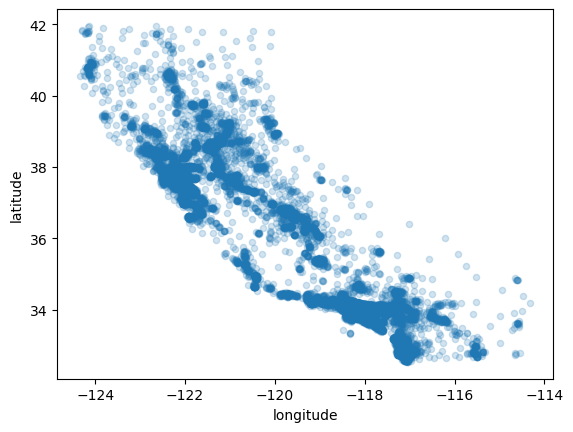

In [78]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2) # create a scatter plot of the housing data based on geographical coordinates with low opacity for better visibility

This can be enhanced further by adding more details such as population and median house value.

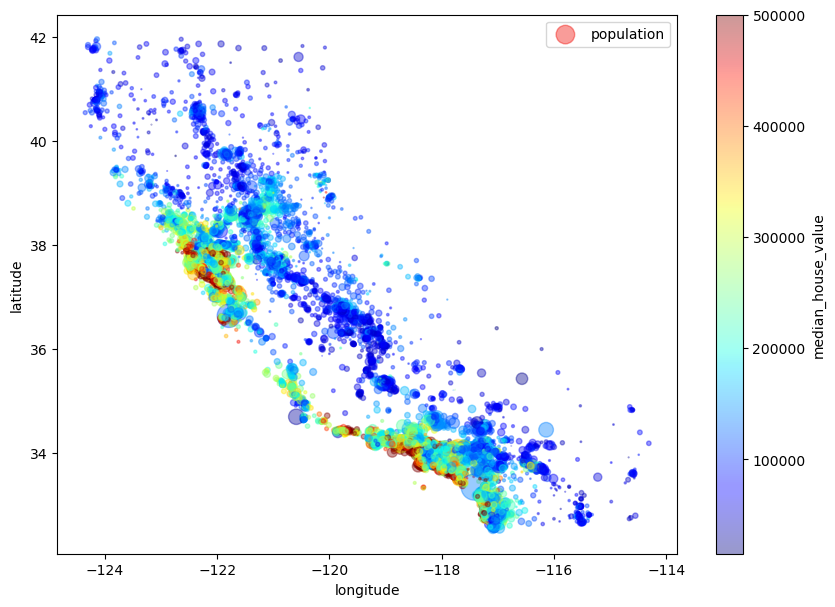

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude",
            s = housing["population"] / 100, label = "population", # set point size based on population
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4, # set point color based on median house value
            legend=True, # display legend
            figsize=(10,7)) # set figure size
plt.show() 

This indicates that housing prices are higher near the coast and in certain areas inland.

The next visualistion is a correlation check to identify which attributes positively / negatively correlate to "nedian_house_value" (range is -1 to 1 with closer to 1 being a strong positive correlation and closer to -1 being a strong negative correlation)

In [80]:
# drop categorical attribute for correlation analysis
housing_numeric = housing.drop("ocean_proximity", axis=1) # create a new DataFrame without the ocean_proximity column for correlation analysis
corr_matrix = housing_numeric.corr() # compute the correlation matrix for the DataFrame

corr_matrix["median_house_value"].sort_values(ascending=False) # display the correlation of each attribute with median_house_value, sorted in descending order

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

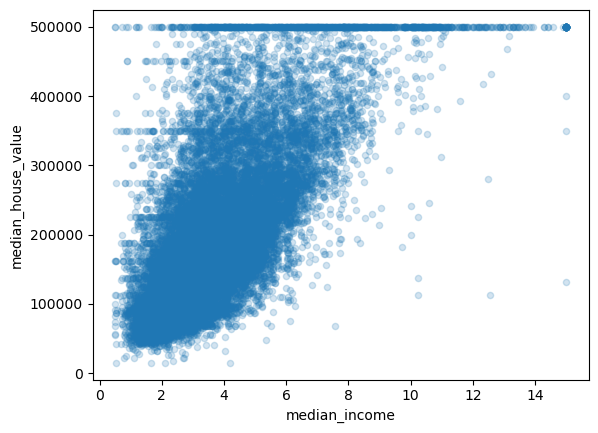

In [81]:
# this shows that median_income has the highest correlation with median_house_value and can also be seen in a scatter plot

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2) # create a scatter plot of median_income vs median_house_value with low opacity for better visibility

It's now worth experimenting with new attribute that may be helpful by combining attribures together to create new ones.
These new attributes can then be considered in a correlation matric as per before.

In [82]:
housing_numeric["rooms_per_household"] = housing_numeric["total_rooms"] / housing_numeric["households"] # create new feature: rooms per household
housing_numeric["bedrooms_per_room"] = housing_numeric["total_bedrooms"] / housing_numeric["total_rooms"] # create new feature: bedrooms per room
housing_numeric["population_per_household"] = housing_numeric["population"] / housing_numeric["households"] # create new feature: population per household

corr_matrix = housing_numeric.corr() # recompute the correlation matrix for the updated DataFrame
corr_matrix["median_house_value"].sort_values(ascending=False) # display the updated correlation of each attribute with median_house_value, sorted in descending order

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<h4><strong>Preparing for ML Algorithms - Non-Pipelined</strong></h4>

We now have a general understanding of the data.  The next stage is to consider what we need to do to clean and prepare the data for the various ML algorithms we will use.

The first task is return to the clean housing data set and separate the target variable (in this instance) <strong>median_house_value</strong> from the data set.

Then we separate the target variable (in this instance) <strong>median_house_value</strong> from the data set.The

In [83]:
housing = strat_train_set.drop("median_house_value", axis=1) # separate features and labels for training set
housing_labels = strat_train_set["median_house_value"].copy()  # label column already named

In [84]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [85]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

We know from the early exploration that there are missing values in the <strong>total_bedrooms</strong> attribute.

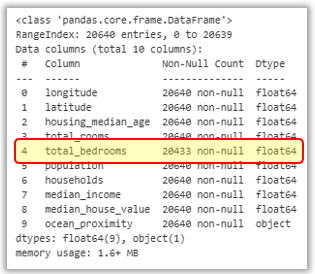

In the main there are three main options;

1. Lose the nul values and all corresponding values for the relevant lines.
2. Lose the <strong>total_bedrooms</strong> attribute.
3. Impute values into the <strong>total_bedrooms</strong> attribute where they are missing (a mean average for example.)

Option 3 is the best option here.

Before we do that, we need to do remove categotrical attributes (or the imputation won't work!).  This means separating out <strong>ocean_proximity</strong>

In [86]:
from sklearn.impute import SimpleImputer # import SimpleImputer from sklearn.impute for handling missing values

imputer = SimpleImputer(strategy="median") # create an imputer object that fills missing values with the median of each column
housing_numeric = housing.select_dtypes(include=[np.number]) # select only numerical columns from the housing DataFrame
imputer.fit(housing_numeric) # fit the imputer to the numerical data
X = imputer.transform(housing_numeric) # transform the data by filling in missing values
housing_num_imputed = pd.DataFrame(X, columns=housing_numeric.columns, index=housing_numeric.index) # convert the transformed data back into a DataFrame with original column names and index
housing_num_imputed.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


Accepting that ML alorithms don't work well with categorical data, the next stge involves converting categorical data into numeric data.
The <strong>ocean_proximity</strong> attribute has a total of five potential values types.
These could be encoded into a numeric value.

In [87]:
housing_cat = strat_train_set[["ocean_proximity"]] # select the categorical column ocean_proximity from the training set
housing_cat.value_counts() # display the counts of unique values in the ocean_proximity column of the training set

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [88]:
from sklearn.preprocessing import OneHotEncoder # import OneHotEncoder from sklearn.preprocessing for categorical encoding
encoder = OneHotEncoder() # create an OneHotEncoder object
housing_cat_encoded = encoder.fit_transform(housing_cat) # fit and transform the categorical data using one-hot encoding
housing_cat_encoded = pd.DataFrame(housing_cat_encoded.toarray(), # convert the sparse matrix to a dense array and then to a DataFrame
                                   columns=encoder.get_feature_names_out(["ocean_proximity"]),
                                   index=housing_cat.index) # keep the original index
housing_cat_encoded.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


We now have two separate DFs;

housing_num_imputed - numeric data with missing values sorted
housing_cat_encoded - categorical data encoded

Feature scaling is the process of transforming numerical features to a common scale, without distorting differences in the ranges of values. Many machine learning algorithms are sensitive to the scale of input features, so scaling helps them perform better.

This is not done to encoded categorical features.

In [89]:
print("Type of housing_num_imputed:")
print(type(housing_num_imputed))
print("Type of housing_cat_encoded:")
print(type(housing_cat_encoded))


Type of housing_num_imputed:
<class 'pandas.core.frame.DataFrame'>
Type of housing_cat_encoded:
<class 'pandas.core.frame.DataFrame'>


Feature scaling is the process of transforming numerical features to a common scale, without distorting differences in the ranges of values. Many machine learning algorithms are sensitive to the scale of input features, so scaling helps them perform better.

This is not done to encoded categorical features.

In [90]:
from sklearn.preprocessing import StandardScaler # import StandardScaler from sklearn.preprocessing for feature scaling
scaler = StandardScaler() # create a StandardScaler object
housing_num_scaled = scaler.fit_transform(housing_num_imputed) # fit and transform the numerical data using standard scaling
housing_num_scaled = pd.DataFrame(housing_num_scaled, columns=housing_num_imputed.columns, index=housing_num_imputed.index) # convert the scaled data back into a DataFrame with original column names and index

''' 
housing_num_scaled and housing_cat_encoded are now the preprocessed numerical and categorical features respectively, ready for model training.
'''

' \nhousing_num_scaled and housing_cat_encoded are now the preprocessed numerical and categorical features respectively, ready for model training.\n'

In [91]:
# Combine numeric and categorical features for training
housing_train_prepared = pd.concat([housing_num_scaled, housing_cat_encoded], axis=1)
print("housing_num_scaled and housing_cat_encoded combined into housing_train_prepared:")
print("Numeric shape:", housing_num_scaled.shape)
print("Categorical shape:", housing_cat_encoded.shape)
print("Combined shape:", housing_train_prepared.shape)


housing_num_scaled and housing_cat_encoded combined into housing_train_prepared:
Numeric shape: (16512, 8)
Categorical shape: (16512, 5)
Combined shape: (16512, 13)


In [92]:
housing_train_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


<h4><strong>Preparing for ML Algorithms - Pipelined</strong></h4>

An alternative method to manually completing data transforms is to leverage Scikit-learn's <strong>pipeline</strong> and <strong>columntransformer</strong> classes.

This is done on the clean <strong>strat_train_set</strong> data

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

numeric_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()) # create a pipeline for numerical data preprocessing using median imputation and standard scaling
categoric_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder()) # create a pipeline for categorical data preprocessing using most frequent imputation and one-hot encoding

numeric_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"] # list of numerical attributes
categorical_attributes = ["ocean_proximity"] # list of categorical attributes

preprocessing_pipeline = ColumnTransformer([
    ("num", numeric_pipeline, numeric_attributes),
    ("cat", categoric_pipeline, categorical_attributes),
]) # create a column transformer that applies the respective pipelines to numerical and categorical attributes

preprocessing = make_column_transformer(
    (numeric_pipeline, make_column_selector(dtype_include=np.number)), # apply numeric pipeline to all numerical columns
    (categoric_pipeline, make_column_selector(dtype_include=object)) # apply categorical pipeline to all categorical columns
) 

housing_pipeline_prepared = preprocessing_pipeline.fit_transform(strat_train_set) # fit and transform the entire housing DataFrame using the preprocessing pipeline
housing_pipeline_prepared = pd.DataFrame(housing_pipeline_prepared, 
                                         columns=(numeric_attributes + list(encoder.get_feature_names_out(["ocean_proximity"]))),
                                         index=strat_train_set.index) # convert the transformed data back into a DataFrame with appropriate column names and index
housing_pipeline_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


In [94]:
print(f"The housing_pipeline_prepared.shape is {housing_pipeline_prepared.shape}")
print(f"The housing pipeline_prepared has {housing_pipeline_prepared.shape[0]} rows and {housing_pipeline_prepared.shape[1]} columns.")
print("\n")
print(f"The housing labels.shape is {housing_labels.shape}")
print(f"The housing labels has {housing_labels.shape[0]} rows.")



The housing_pipeline_prepared.shape is (16512, 13)
The housing pipeline_prepared has 16512 rows and 13 columns.


The housing labels.shape is (16512,)
The housing labels has 16512 rows.


<h4><strong>Selecting and training a model</strong></h4>

We will start with a simple linear regression model

In [95]:
from sklearn.linear_model import LinearRegression # import LinearRegression from sklearn.linear_model for linear regression modeling
lin_reg = LinearRegression() # create a LinearRegression object
lin_reg.fit(housing_pipeline_prepared, housing_labels) # fit the linear regression model to the preprocessed training data and labels

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
lin_reg_housing_predictions = lin_reg.predict(housing_pipeline_prepared) # make predictions on the training data using the fitted linear regression model
print(lin_reg_housing_predictions[:5].round(-2)) # display the first five predictions rounded to the nearest hundred
print(housing_labels.iloc[:5].values) # display the first five actual labels

[270900. 334800. 119900. 109200. 305600.]
[458300. 483800. 101700.  96100. 361800.]


In [107]:
from sklearn.metrics import root_mean_squared_error # import root_mean_squared_error

lin_reg_rmse = root_mean_squared_error(housing_labels, lin_reg_housing_predictions) # calculate the root mean squared error of the linear regression model on the training data
print("Linear Regression RMSE:", lin_reg_rmse) # display the RMSE value


Linear Regression RMSE: 68232.83515124217


We can see that using linear regression, our model is off by an rmse measure of $68,232 - not great!

We will therefore try a decision tree model...

In [103]:
from sklearn.tree import DecisionTreeRegressor # import DecisionTreeRegressor from sklearn.tree for decision tree regression modeling
tree_reg = DecisionTreeRegressor(random_state=42) # create a DecisionTreeRegressor object
tree_reg.fit(housing_pipeline_prepared, housing_labels) # fit the decision tree model to the preprocessed training data and labels

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [106]:
dec_tree_housing_predictions = tree_reg.predict(housing_pipeline_prepared) # make predictions on the training data using the fitted decision tree model
print(dec_tree_housing_predictions[:5].round(-2)) # display the first five predictions rounded to the nearest hundred
print(housing_labels.iloc[:5].values) # display the first five actual labels

[458300. 483800. 101700.  96100. 361800.]
[458300. 483800. 101700.  96100. 361800.]


In [108]:
dec_tree_rmse = root_mean_squared_error(housing_labels, dec_tree_housing_predictions) # calculate the root mean squared error of the decision tree model on the training data
print("Decision Tree RMSE:", dec_tree_rmse) # display the RMSE value

Decision Tree RMSE: 0.0


This has seemingly produced the perfect model!!!  Which seems to be a little too good to be true!  Accordingly, we'll use a better evaluation fo the decision tree model.

In [ ]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklearn.model_selection for cross-validation
scores = cross_val_score(tree_reg, housing_pipeline_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10) # perform 10-fold cross-validation on the decision tree model using negative RMSE as the scoring metric
tree_reg_rmse_scores = -scores # convert negative RMSE scores to positive
print("Decision Tree Cross-Validation RMSE Scores:", tree_reg_rmse_scores) # display the cross-validation RMSE scores
pd.Series(tree_reg_rmse_scores).describe() # display descriptive statistics of the cross-validation RMSE scores (these have to be converted from an array into a Series to use the .describe() method)

Decision Tree Cross-Validation RMSE Scores: [69056.8325947  67221.26914592 67397.26251734 70028.77835992
 68458.77550024 71464.31138671 71044.35429084 68688.64095706
 67300.66681156 66647.53141818]


count       10.000000
mean     68730.842298
std       1671.118463
min      66647.531418
25%      67324.815738
50%      68573.708229
75%      69785.791919
max      71464.311387
dtype: float64

This is not any better (in fact it's worse!)

We'll now try a Random Forest model

In [112]:
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor from sklearn.ensemble for random forest regression modeling
forest_reg = RandomForestRegressor(random_state=42) # create a RandomForestRegressor object
forest_reg.fit(housing_pipeline_prepared, housing_labels) # fit the random forest model to the preprocessed training data and labels

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [113]:
scores = cross_val_score(forest_reg, housing_pipeline_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10) # perform 10-fold cross-validation on the random forest model using negative RMSE as the scoring metric
forest_reg_rmse_scores = -scores # convert negative RMSE scores to positive
print("Random Forest Cross-Validation RMSE Scores:", forest_reg_rmse_scores) # display the cross-validation RMSE scores
pd.Series(forest_reg_rmse_scores).describe() # display descriptive statistics of the cross-validation RMSE scores (these have to be converted from an array into a Series to use the .describe() method)

Random Forest Cross-Validation RMSE Scores: [48484.96959165 50000.16612239 47505.35064619 49316.09714579
 48428.76921481 49128.82161789 48456.75463566 49460.26983712
 48874.68869078 49358.24455204]


count       10.000000
mean     48901.413205
std        706.807744
min      47505.350646
25%      48463.808375
50%      49001.755154
75%      49347.707700
max      50000.166122
dtype: float64